In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import r2_score

import seaborn as sns

In [5]:
# read the data
# Andreas data
#df_inflation = pd.read_csv("./data/data-exam/US_inflation_rates.csv")
df_inflation= pd.read_csv('../../../Documents/GitHub/BI-Fall-2023-Exam-Project/Data/US_inflation_rates.csv')


In [6]:
df_inflation

,date,value
0,1947-01-01,21.480
1,1947-02-01,21.620
2,1947-03-01,22.000
3,1947-04-01,22.000
4,1947-05-01,21.950
...,...,...
913,2023-02-01,301.648
914,2023-03-01,301.808
915,2023-04-01,302.918
916,2023-05-01,303.294


In [7]:
df_inflation.describe()

,value
count,918.000000
mean,117.794828
std,83.736360
min,21.480000
25%,32.105000
50%,106.900000
75%,188.000000
max,303.841000


In [8]:
df_inflation.shape

(918, 2)

## Clean the data

In [9]:
df_inflation.isnull().sum()

date     0
value    0
dtype: int64

## Explore the data

In [10]:
df_inflation.describe()

,value
count,918.000000
mean,117.794828
std,83.736360
min,21.480000
25%,32.105000
50%,106.900000
75%,188.000000
max,303.841000


In [11]:
df_inflation.sample(5)

,date,value
390,1979-07-01,73.00
350,1976-03-01,56.00
96,1955-01-01,26.77
439,1983-08-01,100.10
168,1961-01-01,29.84


In [12]:
# Convert the 'date' column to datetime if it's not already
df_inflation['date'] = pd.to_datetime(df_inflation['date'])

# Extract the year from the 'date' column
df_inflation['year'] = df_inflation['date'].dt.year

In [13]:
# Filter the DataFrame to select years from 1947 to 2023
year_df_inflation = df_inflation[(df_inflation['year'] >= 1947) & (df_inflation['year'] <= 2023)]

In [14]:
# Get the index values of the selected years
index_year_df_inflation = year_df_inflation.index
index_year_df_inflation

RangeIndex(start=0, stop=918, step=1)

In [15]:
# Select columns for X and y based on the data you've shown
X = np.array(index_year_df_inflation).reshape(-1, 1)

In [16]:
X

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [17]:
X[0]

array([0])

In [18]:
y = df_inflation['value'].values.reshape(-1, 1)

In [19]:
y

array([[ 21.48 ],
       [ 21.62 ],
       [ 22.   ],
       [ 22.   ],
       [ 21.95 ],
       [ 22.08 ],
       [ 22.23 ],
       [ 22.4  ],
       [ 22.84 ],
       [ 22.91 ],
       [ 23.06 ],
       [ 23.41 ],
       [ 23.68 ],
       [ 23.67 ],
       [ 23.5  ],
       [ 23.82 ],
       [ 24.01 ],
       [ 24.15 ],
       [ 24.4  ],
       [ 24.43 ],
       [ 24.36 ],
       [ 24.31 ],
       [ 24.16 ],
       [ 24.05 ],
       [ 24.01 ],
       [ 23.91 ],
       [ 23.91 ],
       [ 23.92 ],
       [ 23.91 ],
       [ 23.92 ],
       [ 23.7  ],
       [ 23.7  ],
       [ 23.75 ],
       [ 23.67 ],
       [ 23.7  ],
       [ 23.61 ],
       [ 23.51 ],
       [ 23.61 ],
       [ 23.64 ],
       [ 23.65 ],
       [ 23.77 ],
       [ 23.88 ],
       [ 24.07 ],
       [ 24.2  ],
       [ 24.34 ],
       [ 24.5  ],
       [ 24.6  ],
       [ 24.98 ],
       [ 25.38 ],
       [ 25.83 ],
       [ 25.88 ],
       [ 25.92 ],
       [ 25.99 ],
       [ 25.93 ],
       [ 25.91 ],
       [ 2

In [20]:
y[917]

array([303.841])

In [21]:
df_inflation.sample(5)

,date,value,year
460,1985-05-01,107.20,1985
371,1977-12-01,62.30,1977
612,1998-01-01,162.00,1998
177,1961-10-01,29.98,1961
547,1992-08-01,140.80,1992


In [22]:
y[738]

array([219.016])

In [23]:
# Filter the DataFrame to select years from 1947 to 2023
#selected_years_df = df_inflation[(df_inflation['year'] >= 1947) & (df_inflation['year'] <= 2023)]

## Training the set

In [24]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
X_test

array([[306],
       [711],
       [298],
       [466],
       [253],
       [230],
       [906],
       [ 14],
       [202],
       [ 31],
       [532],
       [420],
       [408],
       [631],
       [145],
       [441],
       [521],
       [390],
       [247],
       [812],
       [249],
       [236],
       [338],
       [523],
       [285],
       [ 65],
       [142],
       [671],
       [566],
       [252],
       [478],
       [150],
       [ 97],
       [658],
       [447],
       [ 77],
       [817],
       [726],
       [372],
       [830],
       [ 55],
       [214],
       [175],
       [789],
       [415],
       [231],
       [271],
       [382],
       [513],
       [916],
       [363],
       [799],
       [667],
       [424],
       [385],
       [826],
       [887],
       [862],
       [436],
       [657],
       [752],
       [384],
       [264],
       [200],
       [350],
       [860],
       [412],
       [596],
       [718],
       [ 60],
       [793],
      

In [26]:
# Fitting Linear Regression to the dataset

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

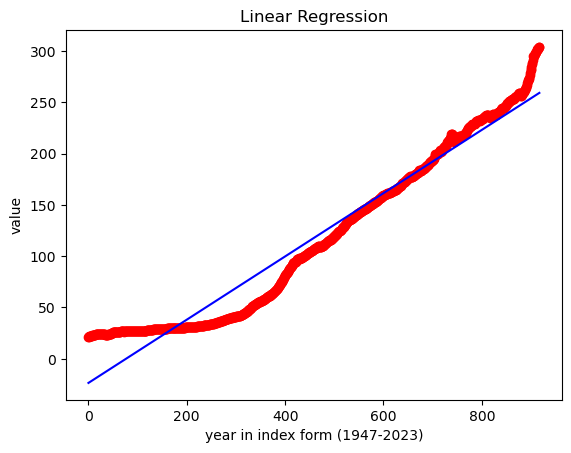

In [27]:
# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Linear Regression')
    plt.xlabel('year in index form (1947-2023)')
    plt.ylabel('value')
    plt.show()
    return
viz_linear()

In [28]:
# Fitting Polynomial Regression to the dataset

poly_model = PolynomialFeatures(degree=5)
X_poly = poly_model.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [29]:
y_predict = pol_reg.predict(X_poly)

In [30]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, y_predict , color='blue')
    plt.title('Polynomia Regression)')
    plt.xlabel('year in index form (1947-2023)')
    plt.ylabel('value')
    plt.show()
    return

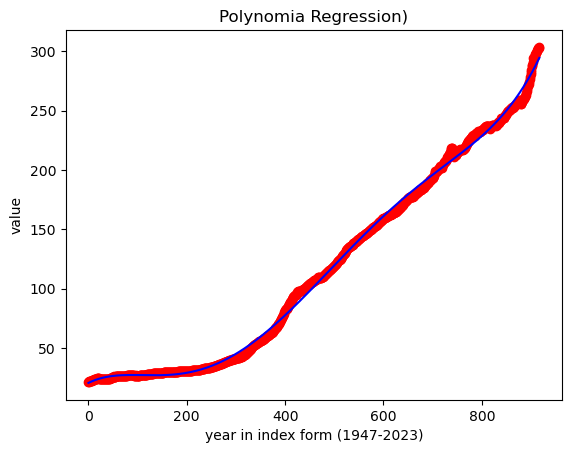

In [31]:
viz_polymonial()

In [32]:
# Additional feature
# Making the plot line more smooth
def viz_polymonial_smooth():
    X_grid = np.arange(min(X), max(X), 0.1)
    X_grid = X_grid.reshape(len(X_grid), 1) #Why do we need to reshape? (https://www.tutorialspoint.com/numpy/numpy_reshape.htm)
    # Visualizing the Polymonial Regression results
    plt.scatter(X, y, color='red')
    plt.plot(X_grid, pol_reg.predict(poly_model.fit_transform(X_grid)), color='blue')
    plt.title('Polynomial Regression')
    plt.xlabel('year in index form (1947-2023)')
    plt.ylabel('value')
    plt.show()
    return

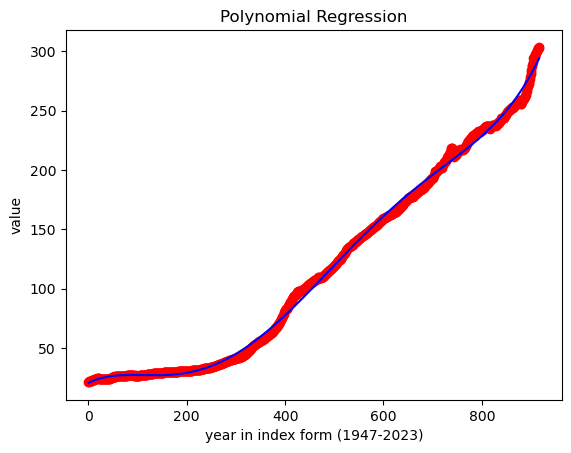

In [33]:
viz_polymonial_smooth()

In [34]:
# Predicting a new result with Linear Regression
lin_reg.predict([[200]])
#output would be 249500

array([[38.14823869]])

In [35]:
# Predicting a new result with Linear Regression
#lin_reg.predict([[100]])
#output would be 249500

#array([[7.33717904]])

In [36]:
# Predicting a new result with Polymonial Regression
yearly_prediction_in_index = pol_reg.predict(poly_model.fit_transform([[996]]))
yearly_prediction_in_index
#output for 2030

array([[391.55193885]])

In [37]:
# Predicting a new result with Polymonial Regression
#pol_reg.predict(poly_model.fit_transform([[638]]))
#output should be 132148.43750003

#array([[175.28375538]])

In [38]:
# Calculate R-squared score for Polynomial Regression
r2_score_poly = r2_score(y, y_predict)
print(f'R-squared (R^2) score for Polynomial Regression: {r2_score_poly:.5f}')

R-squared (R^2) score for Polynomial Regression: 0.99791


1 = 0.95184
2 = 0.98781
3 = 0.99487
4 = 0.99519

5 = 0.99791 H

6 = 0.99767
7 = 0.99773

# To conclude
The predicted Percentage Growth of the US Inflation Rate (2023-2030)

In [39]:
# Create a DataFrame for years 2023.5 to 2030
years_2023_to_2030 = np.arange(2023.5, 2031.5).reshape(-1, 1)
X_pred = poly_model.transform(years_2023_to_2030)
y_pred = pol_reg.predict(X_pred)

In [40]:
# Calculate the percentage growth
percentage_growth = (y_pred - y_pred[0]) / y_pred[0] * 10

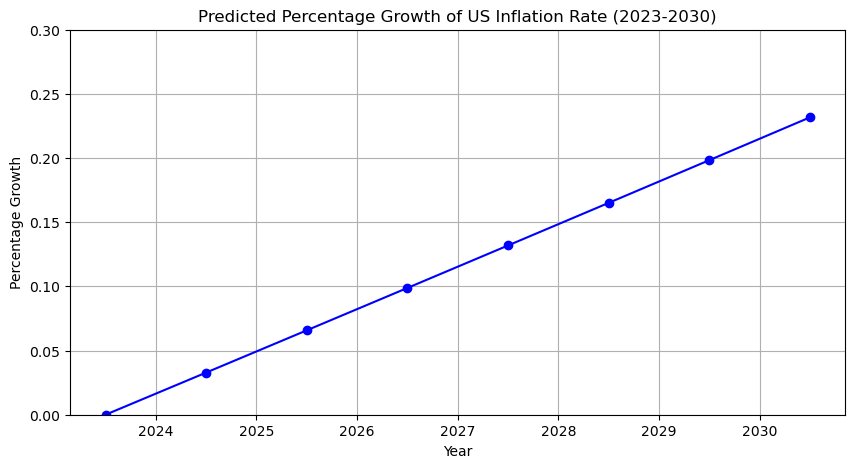

In [41]:
# Plot the predicted percentage growth
plt.figure(figsize=(10, 5))
plt.plot(np.arange(2023.5, 2031.5), percentage_growth, marker='o', linestyle='-', color='b')
plt.title('Predicted Percentage Growth of US Inflation Rate (2023-2030)')
plt.xlabel('Year')
plt.ylabel('Percentage Growth')
plt.ylim(0, .3)  # Set the y-axis limits from 0 to 1
plt.grid(True)
plt.show()

In [42]:
X_pred[7]

array([1.00000000e+00, 2.03050000e+03, 4.12293025e+06, 8.37160987e+09,
       1.69985538e+13, 3.45155636e+16])

 `X_pred[7]` is an array that represents the input features for your polynomial regression model at the 8th point in your prediction range. The elements in `X_pred[7]` correspond to the polynomial features used to make a prediction for the year 2030 (in your specific example). These features are used by the polynomial regression model to estimate the inflation rate for that year.

- `1.00000000e+00` is the bias or intercept term.
- `2.03000000e+03` represents the year 2030 (the x-value for the prediction).
- `4.12090000e+06` is a polynomial feature.
- `8.36542700e+09` is another polynomial feature.
- `1.69818168e+13` is yet another polynomial feature.
- `3.44730881e+16` is the highest-degree polynomial feature.

These features are created based on the polynomial degree you've chosen for your regression model (in your case, degree=5). The model uses these features to make a prediction for the inflation rate in 2030.

So, `X_pred[7]` represents the polynomial feature values for the year 2030 and is used as input to your regression model to estimate the inflation rate for that year. 